# Eldo

# Checkers full code

1) Checkers action space
2) referee for legal moves
3) game baseline working om random picks
4) basic python visualization output

# Input

In [1]:
#used libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mlxtend.plotting import checkerboard_plot
from colorama import Fore, Back, Style
import pdb
from collections import Counter

In [2]:
action_space = [(0,4),#0
 (1,4),#1
 (1,5),#2
 (2,5),#3
 (2,6),#4
 (3,6),#5
 (3,7),#6
 (4,0),#7
 (4,1),#8
 (4,8),#9
 (4,9),#10
 (5,1),#11
 (5,2),#12
 (5,9),#13
 (5,10),#14
 (6,2),#15
 (6,3),#16
 (6,10),#17
 (6,11),#18
 (7,3),#19
 (7,11),#20
 (8,4),#21
 (8,12),#22
 (9,4),#23
 (9,5),#24
 (9,12),#25
 (9,13),#26
 (10,5),#27
 (10,6),#28
 (10,13),#29
 (10,14),#30
 (11,6),#31
 (11,7),#32
 (11,14),#33
 (11,15),#34
 (12,8),#35
 (12,9),#36
 (12,16),#37
 (12,17),#38
 (13,9),#39
 (13,10),#40
 (13,17),#41
 (13,18),#42
 (14,10),#43
 (14,11),#44
 (14,18),#45
 (14,19),#46
 (15,11),#47
 (15,19),#48
 (16, 12),#49
 (16, 20),#50
 (17, 12),#51
 (17, 13),#52
 (17, 20),#53
 (17, 21),#54
 (18, 13),#55
 (18, 14),#56
 (18, 21),#57
 (18, 22),#58
 (19, 14),#59
 (19, 15),#60
 (19, 22),#61
 (19, 23),#62
 (20, 16),#63
 (20, 17),#64
 (20, 24),#65
 (20, 25),#66
 (21, 17),#67
 (21, 18),#68
 (21, 25),#69
 (21, 26),#70
 (22, 18),#71
 (22, 19),#72
 (22, 26),#73
 (22, 27),#74
 (23, 19),#75
 (23, 27),#76
 (24, 20),#77
 (24, 28),#78
 (25, 20),#79
 (25, 21),#80
 (25, 28),#81
 (25, 29),#82
 (26, 21),#83
 (26, 22),#84
 (26, 29),#85
 (26, 30),#86
 (27, 22),#87
 (27, 23),#88
 (27, 30),#89
 (27, 31),#90
 (28, 24),#91
 (28, 25),#92
 (29, 25),#93
 (29, 26),#94
 (30, 26),#95
 (30, 27),#96
 (31, 27)]#97

In [3]:
#initial state
agent = -1 #white
board = np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])#initial board
state = [board,agent]# -> list with state
full_state = [board,agent,(8,12)] # -> initializes the full_state variable which is changed in the baseline
counter = 1

# Referee

In [4]:
def random_select(action_space): #returns random tuple of movement from action_space
    m = action_space[random.randint(0,97)]
    return m

def complete_state(state, move): #creates a complete state list with [board, color, move]
    board = state[0]
    agent = state[1]
    full_state = [board, agent, move]
    return full_state

In [5]:
def combine_list(new_moves, to_append):
    res = []
    for nm in new_moves:
        for ta in to_append:
            combi = nm + ta
            res.append(combi) 
    return res

In [6]:
def iter_clean(ll):
    res = []
    for l in ll:
        if type(l) == tuple:
            res.append(l)
        else:
            res_iter = iter_clean(l)
            res += res_iter
    return res


def remove_duplicates(lst):    
    ll = iter_clean(lst)
    return [(a, b) for i, [a, b] in enumerate(ll) if not any(c == b for _, c in ll[:i])]


def final_clean(ll):
    res = []
    res_2 = []
    for l in ll:
        clean_l = remove_duplicates(l)
        res.append(clean_l)
    for k in res:
        if k not in res_2:
            res_2.append(k)
    max_len = max([len(l) for l in res_2])
    res_2 = [l for l in res_2 if len(l) == max_len]

    return res_2

def clean_val(l):
    my_list = []
    my_list.append(l[0])
    my_list.append(len(l))
    return my_list

In [7]:
def first_queen(opponent_eat, i = 0):
    count = Counter(opponent_eat[i])
    if count[2] == 0:
        i += 1 
        if i >= len(opponent_eat):
            return opponent_eat
        else:
            return first_queen(opponent_eat, i)
    
    elif count[2] == 1:
        #returns the index of the first queen encountered
        return opponent_eat[i].index(max(opponent_eat[i]))
    
    elif count[2] > 1:
        index_del = list_duplicates_of(opponent_eat[i], 1)
        #[index_del.append(opponent_eat[i].index(eat)) for eat in opponent_eat[i] if eat == 1]
        i += 1
        if i >= len(opponent_eat):
            return(opponent_eat)
        
        else:
            for k in range(len(opponent_eat)):
                for item in index_del:
                    opponent_eat[k][item] = 0
            return first_queen(opponent_eat, i)
        

In [8]:
def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs

In [9]:
def eat(board, index, value_to_eat, moves = [[]]):
    new_moves = [[]]
    #pawn
    if len(value_to_eat) == 1: 
        #black
        if value_to_eat[0] < 0:
            if index < 24:
                #if you are on right side
                if index%8 == 7: 
                    #only backward left capture 
                    moves_1 = moves.copy()
                    if board[index+4] == -1 and board[index+7] == 0: 
                        move_end = index+4
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index+7] = 1
                        to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])
                
                #if you are close to right side        
                if index%8 == 3:
                    #only backward left capture
                    moves_1 = moves.copy()
                    if board[index+3] == -1 and board[index+7] == 0: 
                        move_end = index+3
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index+7] = 1
                        to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])
                        
                #if you are on left side
                if index%8 == 0:
                    #only backward right capture
                    moves_1 = moves.copy()
                    if board[index+4] == -1 and board[index+9] == 0: 
                        move_end = index+4
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index+9] = 1
                        to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])

                #if you are close to left side
                if index%8 == 4:
                    #only backward right capture
                    moves_1 = moves.copy()
                    if board[index+5] == -1 and board[index+9] == 0: 
                        move_end = index+5
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index+9] = 1
                        to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])
                
                #if you are in odd row
                if index%8 == 5 or index%8 == 6:
                    moves_1 = moves.copy()
                    moves_2 = moves.copy()
                    #two captures possible backward left or right
                    if board[index+4]== -1 and board[index+7] == 0:
                        move_end = index+4
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index+7] = 1
                        to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])

                    if board[index+5] == -1 and board[index+9] == 0:
                        move_end = index+5
                        moves_2.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index+9] = 1
                        to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                        new_moves += to_append
                        new_moves.append([[moves_2]])
                
                #if you are in even row
                if index%8 == 1 or index%8 == 2:
                    moves_1 = moves.copy()
                    moves_2 = moves.copy()
                    #two captures possible backward left and right
                    if board[index+3]== -1 and board[index+7] == 0:
                        move_end = index+3
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index+7] = 1
                        to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])
                        
                    if board[index+4] == -1 and board[index+9] == 0:
                        move_end = index +4
                        moves_2.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index+9] = 1
                        moves_2.append([(index, move_end)])
                        to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                        new_moves += to_append
                        new_moves.append([[moves_2]])

        
        #white
        if value_to_eat[0] > 0:
            if index > 7:
                #if you are on right side
                if index%8 == 7: 
                    #only forward left capture 
                    moves_1 = moves.copy()
                    if board[index-4]== 1 and board[index-9] == 0: 
                        move_end = index-4
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index-9] = -1
                        to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])
                
                #if you are close to right side        
                if index%8 == 3:
                    #only forward left capture
                    moves_1 = moves.copy()
                    if board[index-5]== 1 and board[index-9] == 0: 
                        move_end = index-5
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index-9] = -1
                        to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])
                    
                #if you are on left side
                if index%8 == 0:
                    #only forward right capture
                    moves_1 = moves.copy()
                    if board[index-4]== 1 and board[index-7] == 0:
                        move_end = index-4
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index-7] = -1
                        to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])

                #if you are close to left side
                if index%8 == 4:
                    #only forward right capture
                    moves_1 = moves.copy()
                    if board[index-3] == 1 and board[index-7] == 0: 
                        move_end = index-3
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index-7] = -1
                        to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])
                
                #if you are in even row
                if index%8 == 5 or index%8 == 6: 
                    #two captures possible forward left or right
                    moves_1 = moves.copy()
                    moves_2 = moves.copy()
                    if board[index-4]== 1 and board[index-9] == 0:
                        move_end = index-4
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index-9] = -1
                        to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])

                    if board[index-3] == 1 and board[index-7] == 0:
                        move_end = index-3
                        moves_2.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index-7] = -1
                        to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                        new_moves += to_append
                        new_moves.append([[moves_2]])

                #if you are in odd row
                if index%8 == 1 or index%8 == 2:
                    #two captures possible forward left or right
                    moves_1 = moves.copy()
                    moves_2 = moves.copy()
                    if board[index-5]== 1 and board[index-9] == 0:
                        move_end = index-5
                        moves_1.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index-9] = -1
                        to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                        new_moves += to_append
                        new_moves.append([[moves_1]])

                    if board[index-4] == 1 and board[index-7] == 0:
                        move_end = index-4
                        moves_2.append((index, move_end))
                        new_board = board.copy()
                        new_board[index] = 0
                        new_board[move_end] = 0
                        new_board[index-7] = -1
                        to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                        new_moves += to_append
                        new_moves.append([[moves_2]])

    #queen
    if len(value_to_eat) == 2:
        #black
        if value_to_eat[0]<0:
            #8 unique capture cases 
            if index == 4:
                #backward right capture
                moves_1 = moves.copy()
                if board[index+5] <0 and board[index+9] == 0:
                    move_end = index+5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = 2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
            
            if index == 0:
                #backward right capture
                moves_1 = moves.copy()
                if board[index+4]<0 and board[index+9] == 0:
                    move_end = index+4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = 2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 7:
                #backward left capture
                moves_1 = moves.copy()
                if board[index+4]<0 and board[index+7] == 0:
                    move_end = index+4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = 2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
            
            if index == 3:
                #backwarfd left capture
                moves_1 = moves.copy()
                if board[index+3] <0 and board[index+7] == 0:
                    move_end = index+3
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = 2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 31:
                #forward left capture
                moves_1 = moves.copy()
                if board[index-4]<0 and board[index-9] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = 2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 27:
                #forwad left capture
                moves_1 = moves.copy()
                if board[index-5]<0 and board[index-9] == 0:
                    move_end = index-5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = 2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 28:
                #forward right capture
                moves_1 = moves.copy()
                if board[index-3]<0 and board[index-7] == 0:
                    move_end = index-3
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = 2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 24:
                #forward right capture
                moves_1 = moves.copy()
                if board[index-4]<0 and board[index-7] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = 2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            #second row central
            if index == 5 or index == 6:
                #two captures - backward left
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                if board[index+4]<0 and board[index+7] == 0:
                    move_end = index+4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = 2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward right
                if board[index+5]<0 and board[index+9] == 0:
                    move_end = index+5
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = 2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #second to last row central
            if index == 25 or index == 26:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #two captures - forward left
                if board[index-5] <0 and board[index-9] == 0:
                    move_end = index-5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = 2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #forward right
                if board[index-4] <0 and board[index-7] == 0:
                    move_end = index-4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = 2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #left side 
            if index == 8 or index == 16:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #two captures - forward right
                if board[index-4] <0 and board[index-7] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = 2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward right
                if board[index+4] <0 and board[index+9] == 0:
                    move_end = index+4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = 2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                
            #right side
            if index == 15 or index == 23:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #two captures - forward left
                if board[index-4] <0 and board[index-9] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = 2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward left
                if board[index+4] <0 and board[index+7] == 0:
                    move_end = index+4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = 2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #first row central
            if index == 1 or index == 2:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #two captures - backward left
                if board[index+3] <0 and board[index+7] == 0:
                    move_end = index+3
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = 2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward right
                if board[index+4] <0 and board[index+9] == 0:
                    move_end = index+4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = 2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #last row central
            if index == 29 or index == 30:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #two captures - forward left
                if board[index-4] <0 and board[index-9] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = 2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #forward right
                if board[index-3]<0 and board[index-7] == 0:
                    move_end = index-3
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = 2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #second column left
            if index == 12 or index == 20:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #two captures - forward right
                if board[index-3] <0 and board[index-7] == 0:
                    move_end = index-3
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = 2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward right
                if board[index+5] <0 and board[index+9] == 0:
                    move_end = index+5
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = 2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #second column right
            if index == 11 or index == 19:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #only two captures - forward left
                if board[index-5] <0 and board[index-9] == 0:
                    move_end = index-5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = 2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward left
                if board[index+3] <0 and board[index+7] == 0:
                    move_end = index+3
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = 2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            if index == 13 or index == 14 or index == 21 or index == 22:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                moves_3 = moves.copy()
                moves_4 = moves.copy()
                #four possible capture - forward left
                if board[index-4] <0 and board[index-9] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = 2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #forward right
                if board[index-3] <0 and board[index-7] == 0:
                    move_end = index-3
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = 2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
                #backward left
                if board[index+4] <0 and board[index+7] == 0:
                    move_end = index+4
                    moves_3.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = 2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_3])
                    new_moves += to_append
                    new_moves.append([[moves_3]])

                #backward right
                if board[index+5] <0 and board[index+9] == 0:
                    move_end = index+5
                    moves_4.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = 2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_4])
                    new_moves += to_append
                    new_moves.append([[moves_4]])
                    
            if index == 9 or index == 10 or index == 17 or index == 18:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                moves_3 = moves.copy()
                moves_4 = moves.copy()
                #four possible capture - forward left
                if board[index-5] <0 and board[index-9] == 0:
                    move_end = index-5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = 2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #forward right
                if board[index-4] <0 and board[index-7] == 0:
                    move_end = index-4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = 2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])

                #backward left
                if board[index+3] <0 and board[index+7] == 0:
                    move_end = index+3
                    moves_3.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = 2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_3])
                    new_moves += to_append
                    new_moves.append([[moves_3]])

                #backward right
                if board[index+4] <0 and board[index+9] == 0:
                    move_end = index+4
                    moves_4.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = 2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_4])
                    new_moves += to_append
                    new_moves.append([[moves_4]])
                    

        #white
        if value_to_eat[0]>0:
            #8 unique capture cases 
            if index == 4:
                moves_1 = moves.copy()
                #backward right capture
                if board[index+5] >0 and board[index+9] == 0:
                    move_end = index+5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = -2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
            
            if index == 0:
                moves_1 = moves.copy()
                #backward right capture
                if board[index+4]>0 and board[index+9] == 0:
                    move_end = index+4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = -2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 7:
                moves_1 = moves.copy()
                #backward left capture
                if board[index+4]>0 and board[index+7] == 0:
                    move_end = index+4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = -2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
            
            if index == 3:
                moves_1 = moves.copy()
                #backwarfd left capture
                if board[index+3] >0 and board[index+7] == 0:
                    move_end = index+3
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = -2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 31:
                moves_1 = moves.copy()
                #forward left capture
                if board[index-4]>0 and board[index-9] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = -2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 27:
                moves_1 = moves.copy()
                #forwad left capture
                if board[index-5]>0 and board[index-9] == 0:
                    move_end = index-5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = -2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 28:
                moves_1 = moves.copy()
                #forward right capture
                if board[index-3]>0 and board[index-7] == 0:
                    move_end = index-3
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = -2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            if index == 24:
                moves_1 = moves.copy()
                #forward right capture
                if board[index-4]>0 and board[index-7] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = -2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])
                    
            #second row central
            if index == 5 or index == 6:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #two captures - backward left
                if board[index+4]>0 and board[index+7] == 0:
                    move_end = index+4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = -2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward right
                if board[index+5]>0 and board[index+9] == 0:
                    move_end = index+5
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = -2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #secont to last row central
            if index == 25 or index == 26:
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                #two captures - forward left
                if board[index-5] >0 and board[index-9] == 0:
                    move_end = index-5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = -2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #forward right
                if board[index-4] >0 and board[index-7] == 0:
                    move_end = index-4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = -2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #left side 
            if index == 8 or index == 16:
                #two capture forward right
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                if board[index-4] >0 and board[index-7] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = -2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward right
                if board[index+4] >0 and board[index+9] == 0:
                    move_end = index+4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = -2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                
            #right side
            if index == 15 or index == 23:
                #two captures forward left
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                if board[index-4] >0 and board[index-9] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = -2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward left
                if board[index+4] >0 and board[index+7] == 0:
                    move_end = index+4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = -2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #first row central
            if index == 1 or index == 2:
                #two captures - backward left
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                if board[index+3] >0 and board[index+7] == 0:
                    move_end = index+3
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = -2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward right
                if board[index+4] >0 and board[index+9] == 0:
                    move_end = index+4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = -2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #last row central
            if index == 29 or index == 30:
                #two captures - forward left
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                if board[index-4] >0 and board[index-9] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = -2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #forward right
                if board[index-3] >0 and board[index-7] == 0:
                    move_end = index-3
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = -2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #second column left
            if index == 12 or index == 20:
                #two captures - forward right
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                if board[index-3] >0 and board[index-7] == 0:
                    move_end = index-3
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = -2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward right
                if board[index+5] >0 and board[index+9] == 0:
                    move_end = index+5
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = -2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            #second column right
            if index == 11 or index == 19:
                #only two captures - forward left
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                if board[index-5] >0 and board[index-9] == 0:
                    move_end = index-5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = -2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #backward left
                if board[index+3] >0 and board[index+7] == 0:
                    move_end = index+3
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = -2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])
                    
            if index == 13 or index == 14 or index == 21 or index == 22:
                #four possible capture - forward left
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                moves_3 = moves.copy()
                moves_4 = moves.copy()
                if board[index-4] >0 and board[index-9] == 0:
                    move_end = index-4
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = -2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #forward right
                if board[index-3] >0 and board[index-7] == 0:
                    move_end = index-3
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = -2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])

                #backward left
                if board[index+4] >0 and board[index+7] == 0:
                    move_end = index+4
                    moves_3.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = -2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_3])
                    new_moves += to_append
                    new_moves.append([[moves_3]])

                #backward right
                if board[index+5] >0 and board[index+9] == 0:
                    move_end = index+5
                    moves_4.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = -2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_4])
                    new_moves += to_append
                    new_moves.append([[moves_4]])
                    
            if index == 9 or index == 10 or index == 17 or index == 18:
                #four possible capture - forward left
                moves_1 = moves.copy()
                moves_2 = moves.copy()
                moves_3 = moves.copy()
                moves_4 = moves.copy()
                if board[index-5] >0 and board[index-9] == 0:
                    move_end = index-5
                    moves_1.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-9] = -2
                    to_append = eat(new_board, index-9, value_to_eat= value_to_eat, moves = [moves_1])
                    new_moves += to_append
                    new_moves.append([[moves_1]])

                #forward right
                if board[index-4] >0 and board[index-7] == 0:
                    move_end = index-4
                    moves_2.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index-7] = -2
                    to_append = eat(new_board, index-7, value_to_eat= value_to_eat, moves = [moves_2])
                    new_moves += to_append
                    new_moves.append([[moves_2]])

                #backward left
                if board[index+3] >0 and board[index+7] == 0:
                    move_end = index+3
                    moves_3.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+7] = -2
                    to_append = eat(new_board, index+7, value_to_eat= value_to_eat, moves = [moves_3])
                    new_moves += to_append
                    new_moves.append([[moves_3]])

                #backward right
                if board[index+4] >0 and board[index+9] == 0:
                    move_end = index+4
                    moves_4.append((index, move_end))
                    new_board = board.copy()
                    new_board[index] = 0
                    new_board[move_end] = 0
                    new_board[index+9] = -2
                    to_append = eat(new_board, index+9, value_to_eat= value_to_eat, moves = [moves_4])
                    new_moves += to_append
                    new_moves.append([[moves_4]])

    if len(new_moves) == 0:
        return new_moves
#    max_len = max([len(l) for l in new_moves])
#    new_moves = [l for l in new_moves if len(l) == max_len]

    
    return combine_list(moves, new_moves)

In [10]:
def can_eat(full_state): #out [boolean, dict]
    board = full_state[0]#board
    color = full_state[1]#color
    move = full_state[2]#move - tuple
    my_dict = {}
    #black
    if color == 1:
        #index of black pawns
        index_list = (np.where(board>0))[0]
        #index_list = index_list
        for index in index_list:
            if board[index] == 2:
                my_dict[index] = final_clean(eat(board, index, value_to_eat=[-1,-2]))
            else:
                my_dict[index] = final_clean(eat(board, index, value_to_eat=[-1]))
    
    #white
    if color == -1:
        #index of white pawns
        index_list = (np.where(board<0))[0]
        #index_list = index_list[0]
        for index in index_list:
            if board[index] == -2:
                my_dict[index] = final_clean(eat(board, index, value_to_eat=[1,2]))
            else:
                my_dict[index] = final_clean(eat(board, index, value_to_eat=[1]))
    
    values = 0
    for index, square in enumerate(my_dict):
        for cap in my_dict[square]:
            values += len(cap)
    if values != 0:
        return [True, my_dict]
    else:
        return [False,0] 

In [11]:
#move_piece function when not eating
def move_piece(full_state):
    agent_turn = full_state[1] #who is playing - black or white

    start = full_state[2][0] #randomly selected start position
    stop = full_state[2][1] #randomly selected stop position
    
    agent_start = full_state[0][start] #piece on start space / agent black: +1, white: -1, bQ = +2, wQ = -2, 0 empty
    agent_stop = full_state[0][stop] #piece on stop space / agent black: +1, white: -1, bQ = +2, wQ = -2, 0 empty

    if agent_turn == 1:#turn is black
        if agent_start == 1: #start position occupied by black pawn, check direction
            if stop > start:#good direction for black 
                if agent_stop == 0: #adjacent space is free and can move
                    return True #good move for white on free space
                else:
                    return False #adjacent space is not empty
            else:
                return False #wrong direction for black
        elif agent_start == 2: #start position occupied by black queen, check direction
            if agent_stop == 0: #adjacent space is free and can move
                return True #good move for black Queen on free space
            else:
                return False #adjacent space is not free and can't move
        else:
            return False #start position is empty - no piece on it

    elif agent_turn == -1:#turn is white
        if agent_start == -1: #start position occupied by white pawn, check direction
            if stop < start:#good direction for white 
                if agent_stop == 0: #adjacent space is free and can move
                    return True #good move for black on free space
                else:
                    return False #adjacent space is not empty
            else:
                return False #wrong direction for white
        elif agent_start == -2: #start position occupied by white queen, check direction
            if agent_stop == 0: #adjacent space is free and can move
                return True #good move for white Queen on free space
            else:
                return False #adjacent space is not free and can't move
        else:
            return False #start position is empty - no piece on it
    else:
        return False #any other option  

In [12]:
def fix_dict(moves_dict, board):#returns list of list of priority capture(s)
    my_board = board.copy()
    moves = moves_dict
    possible_moves = []
    queen = []
    max_eat = 0
    cap_val = {}
    for x in moves.values():
        for cap in x:
            #print(eat_val)
            eat_val = 0
            if len(cap) > max_eat:
                max_eat = len(cap)
            for move in cap: 
                eat_val += abs(my_board[move[1]])
            cap_val[f'{cap}'] = eat_val
    
    #append all the longest captures
    for x in moves.values():
        for i in x:
            if len(i) == max_eat:
                possible_moves.append(i)

    if len(possible_moves) > 1:
        #check if queens can eat
        new_pm = [cap for cap in possible_moves if abs(my_board[cap[0][0]]) == 2]
        if len(new_pm) > 1:    
            #check what is the total max value to eat
            max_val = max([cap_val[f'{l}'] for l in new_pm])
            res = [l for l in new_pm if cap_val[f'{l}'] == max_val]

            if len(res) > 1:
                #check which one encounters queen first 
                opponent_eat = []
                if len(res) > 1:
                    for i in range(max_eat):
                        opponent_eat.append([abs(my_board[cap[i][1]]) for cap in res])
                
                res_2 = first_queen(opponent_eat)
                if isinstance(res_2, int):
                    return [res[res_2]]
                else:       
                    new_res = []
                    i = -1
                    for x in res_2[-1]:
                        i += 1
                        if x != 0:
                            new_res.append(res_2[-1].index(x, i))
                    return [res[cap] for cap in new_res]
            else: 
                return [res[0]]
        
        else:
            if not new_pm:
                return possible_moves
            return new_pm
        
    else:
        return [possible_moves[0]]

In [13]:
bb = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,])

bb[4] = 1
bb[6] = 1
bb[9] = -1
bb[10] = -1
bb[17] = -1
bb[18] = -1



#vis(bb)

In [14]:
fix_dict(can_eat([bb, 1, (21,25)])[1], bb)

[[(4, 9), (13, 17)],
 [(4, 9), (13, 18)],
 [(6, 10), (13, 17)],
 [(6, 10), (13, 18)]]

In [15]:
def eating_priority(my_dict, full_state):#eating priority main function IN: dictionary OUT: -> Boolean
    move_list = fix_dict(my_dict, full_state[0])

    if len(move_list) == 1:
        return move_list[0][0] == full_state[2]
    
    res = [full_state[2] == x[0] for x in move_list]#CHANGE - COULD BE BETTER

    if True in res:
        return True
    return False

In [16]:
eating_priority(can_eat([bb, 1, (9,5)])[1], [bb, 1, (6,10)])

True

In [17]:
def referee(action_space, full_state):#full_state to be called with baseline_game with full_state defined as local variable
    #OUT: [BOOLEAN, dict of prio move(s)]
    A = can_eat(full_state)[0] #boolean
    #print('full_state_ref',full_state)

    if A == True:
        possible_cap = fix_dict(can_eat(full_state)[1], full_state[0]) 
        B = eating_priority(can_eat(full_state)[1], full_state)
        if B == True:
            return [True, possible_cap]
        else:
            return [False, 0]
    elif A == False:
        C = move_piece(full_state)
        if C == True:
            return [True, 0]
        else: 
            return [False, 0]
    else:
        return [False, 0]

# Next State

In [18]:
def capture(board,move): #works inside next_state
    new_board = board.copy()
    row = math.floor(move[0] / 4)
    start_col = move[0] % 4
    end_col = move[1] % 4

    #if even numbered row
    if row % 2 == 0:
        if move[0] < move[1]:
            if end_col < start_col:
                #down left
                new_board[move[1]] = 0
                new_board[move[0]+7] = new_board[move[0]]
                new_board[move[0]] = 0
                pass
            elif end_col >= start_col:
                #down right
                new_board[move[1]] = 0
                new_board[move[0]+9] = new_board[move[0]]
                new_board[move[0]] = 0
        if move[0] > move[1]:
            if end_col< start_col:
                #up left
                new_board[move[1]] = 0
                new_board[move[0]-9] = new_board[move[0]]
                new_board[move[0]] = 0
            if end_col >= start_col:
                #up right
                new_board[move[1]] = 0
                new_board[move[0]-7] = new_board[move[0]]
                new_board[move[0]] = 0
                    
    #if odd numbered row
    elif row % 2 != 0:
        if move[0] < move[1]:
            if end_col <= start_col:
                #down left
                new_board[move[1]] = 0
                new_board[move[0]+7] = new_board[move[0]]
                new_board[move[0]] = 0
            elif end_col > start_col:
                #down right
                new_board[move[1]] = 0
                new_board[move[0]+9] = new_board[move[0]]
                new_board[move[0]] = 0
        if move[0] > move[1]:
            if end_col<= start_col:
                #up left
                new_board[move[1]] = 0
                new_board[move[0]-9] = new_board[move[0]]
                new_board[move[0]] = 0
            if end_col > start_col:
                #up right
                new_board[move[1]] = 0
                new_board[move[0]-7] = new_board[move[0]]
                new_board[move[0]] = 0
    return new_board

In [19]:
def normal_move(board,move): #works inside next_state
    new_board = board.copy()
    if move[1] >= 28 and new_board[move[0]] == 1:
        new_board[move[1]] = 2
        new_board[move[0]] = 0
        
    elif move[1] <= 3 and new_board[move[0]] == -1:
        #pdb.set_trace()
        new_board[move[1]] = -2
        new_board[move[0]] = 0
    
    else:
        new_board[move[1]] = new_board[move[0]]
        new_board[move[0]] = 0
    return new_board

In [20]:
def nextState(full_state,move): #compute next state IN: list with board np.array, int for color, tuple for move
    board = full_state[0]
    if board[move[1]] == 0:
        board = normal_move(board,move)
        return board
    else:
        board = capture(board,move)
    return board

In [21]:
def nextStatev2(full_state,move, possible_captures):
    new_board = full_state[0].copy()
    k = 0
    if possible_captures == 0:
        new_board = nextState([new_board, full_state[1], full_state[2]],move)
        return new_board
    
    if len(possible_captures) == 1:
        for cap in possible_captures:
            for i in cap:
                new_board = nextState([new_board, full_state[1], full_state[2]],i)
    
    
    else:
        #TO BE CHANGED FOR REAL MODEL
        for cap in possible_captures:
            if move in cap:
                k += 1
                if k == 2:
                    break
                for i in cap:
                    new_board = nextState([new_board, full_state[1], full_state[2]],i)
            
    for x in range(0,4):
        if new_board[x] == -1:
            new_board[x] = -2
            
    for x in range(28,32):
        if new_board[x] == 1:
            new_board[x] = 2
    
    return new_board

# Game Baseline

In [22]:
def baseline_game(action_space,state): 
    legal_bl = False
    i = 0 #delete for real model
    turn_without_cap = 0
    while legal_bl == False:
        i += 1 #delete for real model
        
        #create a move by extracting a tuple
        move = random_select(action_space)
        
        # full_state = [board (np.array), agent color (int), move (tuple)]
        full_state = complete_state(state, move)

        output_ref = referee(action_space,full_state) #out [True, move]
        legal_bl = output_ref[0]
        
        if legal_bl == True:
            print(f"Last try: {move}")
            print(f"# iterations: {i} -> False")
            break
        
        if i > 9999:
            return [state[0], state[1], False]
            
        else:
            continue

    possible_cap = output_ref[1]
    move = full_state[2]
        
    if full_state[0][move[1]] == 0:
        turn_without_cap += 1
    else:
        turn_without_cap = 0
    board = nextStatev2(full_state, move, possible_cap)# -> no.array / new board based 
        
    if state[1] > 0:
        agent = -1
    else:
        agent = 1
    #pdb.set_trace()    
    return [board,agent, True, turn_without_cap] #list [board = np.array, agent = integer]

In [23]:
def winner(state):
    board = state[0]
    
    if len(np.where(board > 0)[0]) == 0:
        return '=> Game over! The winner is White :)'

    elif len(np.where(board < 0)[0]) == 0:
        return '=> Game over! The winner is Black :)'
    
    if len(np.where(board > 0)[0]) <= 2:
        return '=> Game over! The winner is White :)'
    
    elif len(np.where(board < 0)[0]) <= 2:
        return '=> Game over! The winner is White :)'

    else:
        return 'Something is wrong'

# Visualization

In [34]:
def visualize(state): #state: list (board: np.array, agent: int +1 or -1) -> this function just prints
    board = state[0].tolist()
    agent = state[1]
    full_board = []
    new_board = np.array_split(board, 8)
    i = 0
    finished_board = []
    for i in range(0,8):
        if i%2 == 0:
            row =[]
            for x in new_board[i]:
                row.append(x)
                row.append(0)
        else:
            row = []
            for x in new_board[i]:
                row.append(0)
                row.append(x)
        finished_board.append(row)
    ary = np.array(finished_board)
    brd = checkerboard_plot(cell_colors=('black', 'white'), font_colors=('white', 'black'), ary = ary, fmt = '%d',
                            figsize=(3, 3), fontsize = 10)
    plt.show()

# Game

In [35]:
#Game script

def game(action_space, state, counter):  #counter = 1  
    print("Initial Board - Turn: White")
    visualize(state) #initial visualization
    t=0
    turns_without_cap = 0
    for t in range(1000):# -> 1000 plays
        play_next = input(Fore.WHITE + Back.GREEN +'Press to play ' + Style.RESET_ALL)
        print()
        if state[1] > 0: #it provides the player for the active move
            player = 'Black'
            next_player = 'White'
            print(f"Play: {counter } / Played by: {player} / Next player: {next_player}")#display active play
        else:
            player = 'White'
            next_player = 'Black'
            print(f"Play: {counter} / Played by: {player} / Next player: {next_player}")#display active play
        counter = t+2
        state = baseline_game(action_space,state)#[board,agent] #state = list [board = np.array, agent = integer]

        if len(state) == 4:
            if state[3] != 0:
                turns_without_cap += 1
            else:
                turns_without_cap = 0
        
        if turns_without_cap >= 50:
            return "It's a draw!"
        
        if state[2] == False:
            return winner([state[0], state[1]])
        #print(counter)
        visualize(state)

    print(winner(state))

# Execute

In [36]:
#initial board
board_1 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

state[0] = board_1

Initial Board - Turn: White


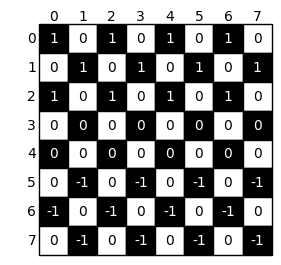

Press to play 

Play: 1 / Played by: White / Next player: Black
Last try: (21, 17)
# iterations: 8 -> False


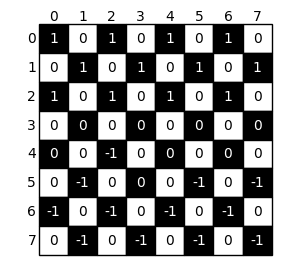

Press to play 

Play: 2 / Played by: Black / Next player: White
Last try: (10, 13)
# iterations: 16 -> False


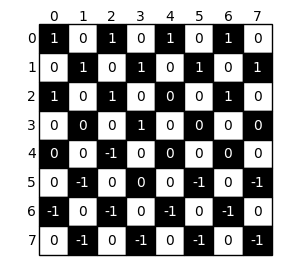

Press to play 

Play: 3 / Played by: White / Next player: Black
Last try: (17, 13)
# iterations: 48 -> False


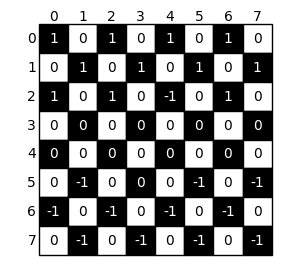

Press to play 

Play: 4 / Played by: Black / Next player: White
Last try: (5, 10)
# iterations: 2 -> False


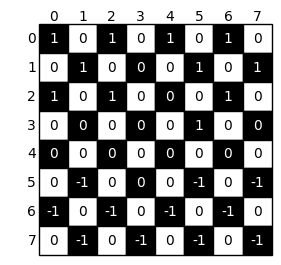

Press to play 

Play: 5 / Played by: White / Next player: Black
Last try: (26, 21)
# iterations: 2 -> False


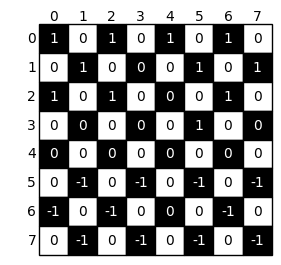

Press to play 

Play: 6 / Played by: Black / Next player: White
Last try: (9, 13)
# iterations: 4 -> False


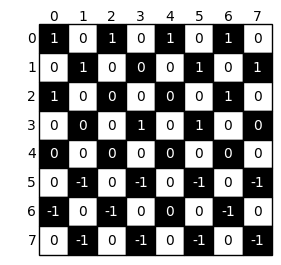

Press to play 

Play: 7 / Played by: White / Next player: Black
Last try: (21, 18)
# iterations: 4 -> False


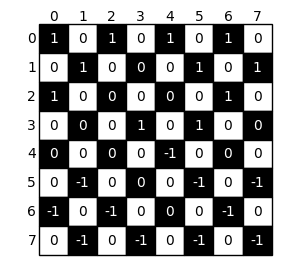

Press to play 

Play: 8 / Played by: Black / Next player: White
Last try: (14, 18)
# iterations: 63 -> False


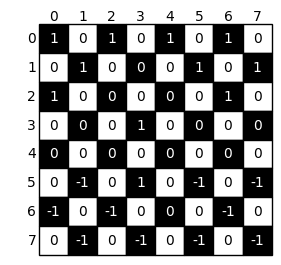

Press to play 

Play: 9 / Played by: White / Next player: Black
Last try: (25, 21)
# iterations: 13 -> False


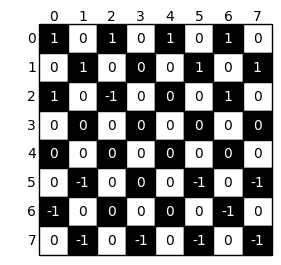

Press to play 

Play: 10 / Played by: Black / Next player: White
Last try: (4, 9)
# iterations: 22 -> False


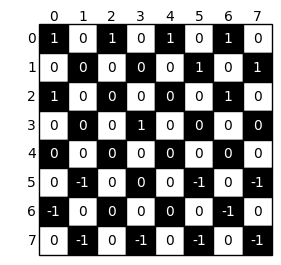

Press to play 

Play: 11 / Played by: White / Next player: Black
Last try: (29, 25)
# iterations: 2 -> False


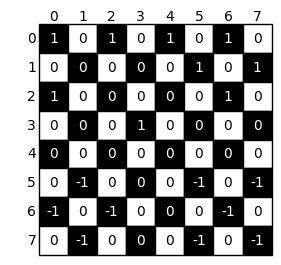

Press to play 

Play: 12 / Played by: Black / Next player: White
Last try: (1, 4)
# iterations: 6 -> False


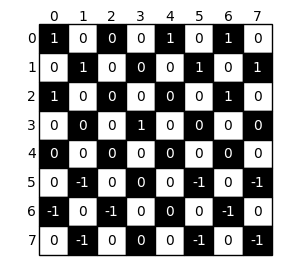

Press to play 

Play: 13 / Played by: White / Next player: Black
Last try: (22, 19)
# iterations: 13 -> False


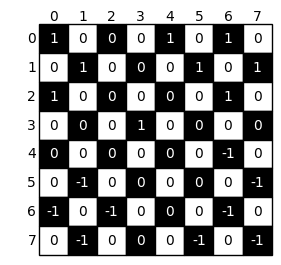

Press to play 

Play: 14 / Played by: Black / Next player: White
Last try: (13, 18)
# iterations: 4 -> False


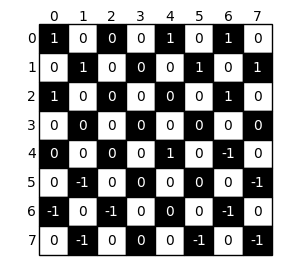

Press to play 

Play: 15 / Played by: White / Next player: Black
Last try: (25, 21)
# iterations: 3 -> False


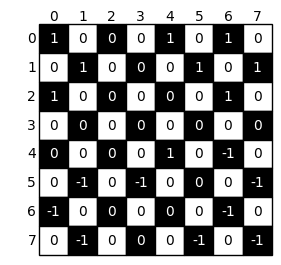

Press to play 

Play: 16 / Played by: Black / Next player: White
Last try: (18, 21)
# iterations: 45 -> False


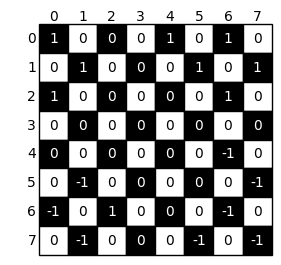

Press to play 

Play: 17 / Played by: White / Next player: Black
Last try: (28, 25)
# iterations: 65 -> False


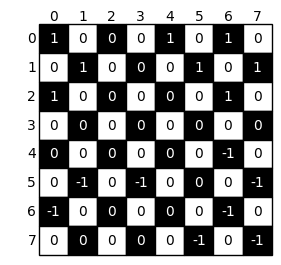

Press to play 

Play: 18 / Played by: Black / Next player: White
Last try: (8, 12)
# iterations: 39 -> False


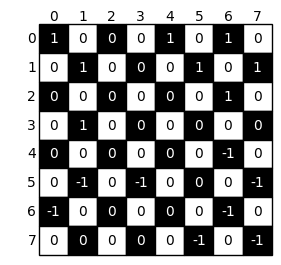

Press to play 

Play: 19 / Played by: White / Next player: Black
Last try: (21, 17)
# iterations: 38 -> False


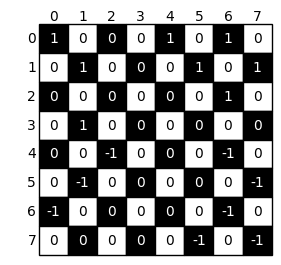

Press to play 

Play: 20 / Played by: Black / Next player: White
Last try: (12, 17)
# iterations: 184 -> False


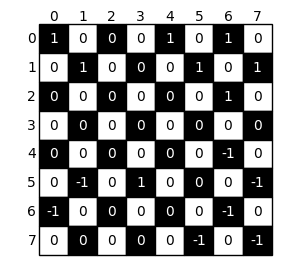

Press to play 

Play: 21 / Played by: White / Next player: Black
Last try: (30, 26)
# iterations: 12 -> False


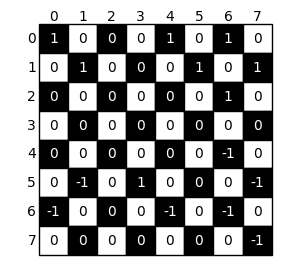

Press to play 

Play: 22 / Played by: Black / Next player: White
Last try: (21, 26)
# iterations: 125 -> False


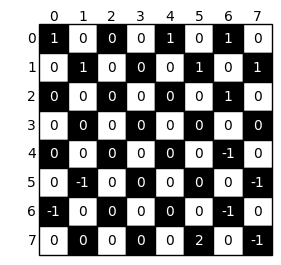

Press to play 

Play: 23 / Played by: White / Next player: Black
Last try: (27, 22)
# iterations: 4 -> False


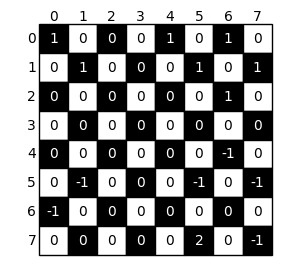

Press to play 

Play: 24 / Played by: Black / Next player: White
Last try: (11, 14)
# iterations: 19 -> False


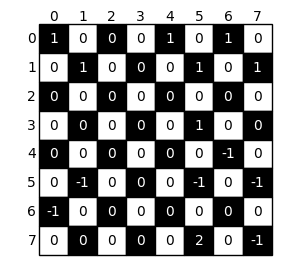

Press to play 

Play: 25 / Played by: White / Next player: Black
Last try: (19, 14)
# iterations: 6 -> False


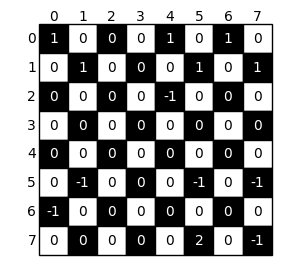

Press to play 

Play: 26 / Played by: Black / Next player: White
Last try: (6, 10)
# iterations: 144 -> False


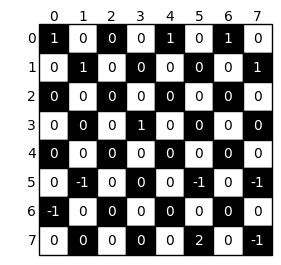

Press to play 

Play: 27 / Played by: White / Next player: Black
Last try: (20, 17)
# iterations: 3 -> False


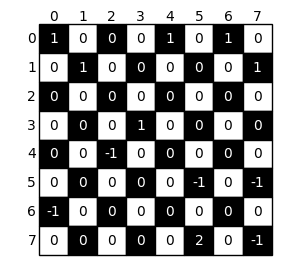

Press to play 

Play: 28 / Played by: Black / Next player: White
Last try: (13, 17)
# iterations: 49 -> False


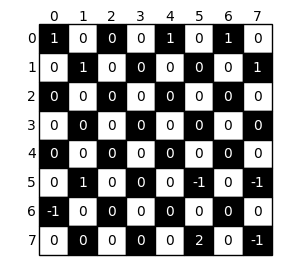

Press to play 

Play: 29 / Played by: White / Next player: Black
Last try: (24, 20)
# iterations: 17 -> False


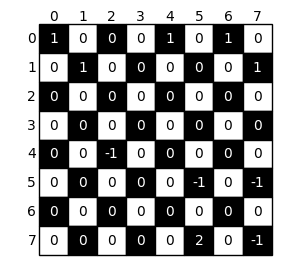

Press to play 

Play: 30 / Played by: Black / Next player: White
Last try: (3, 6)
# iterations: 1 -> False


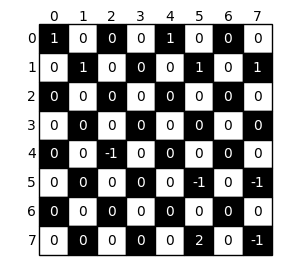

Press to play 

Play: 31 / Played by: White / Next player: Black
Last try: (17, 12)
# iterations: 15 -> False


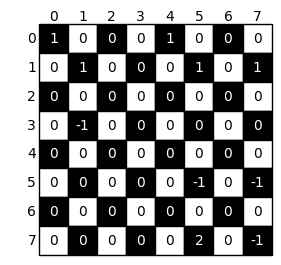

Press to play 

Play: 32 / Played by: Black / Next player: White
Last try: (2, 5)
# iterations: 9 -> False


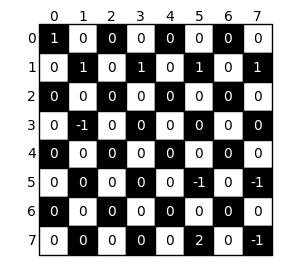

Press to play 

Play: 33 / Played by: White / Next player: Black
Last try: (12, 9)
# iterations: 18 -> False


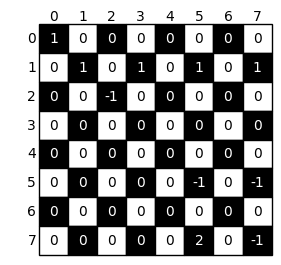

Press to play 

Play: 34 / Played by: Black / Next player: White
Last try: (4, 9)
# iterations: 92 -> False


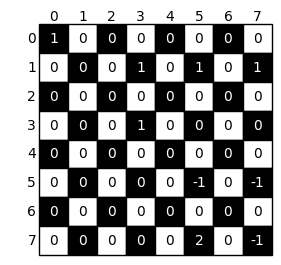

Press to play 

Play: 35 / Played by: White / Next player: Black
Last try: (23, 19)
# iterations: 7 -> False


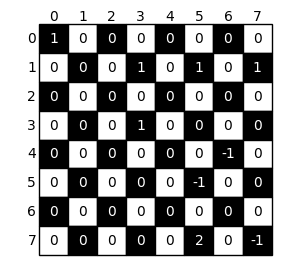

Press to play 

Play: 36 / Played by: Black / Next player: White
Last try: (7, 11)
# iterations: 9 -> False


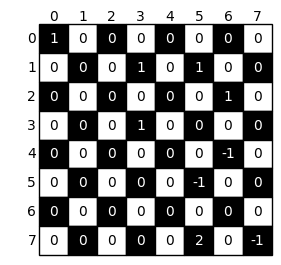

Press to play 

Play: 37 / Played by: White / Next player: Black
Last try: (22, 18)
# iterations: 11 -> False


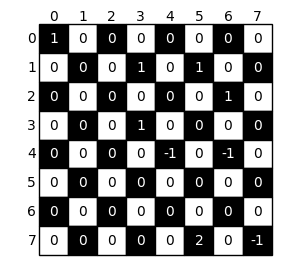

Press to play 

Play: 38 / Played by: Black / Next player: White
Last try: (13, 18)
# iterations: 14 -> False


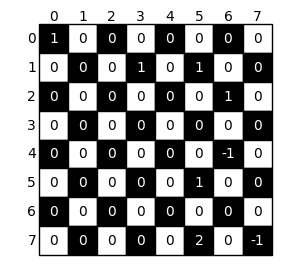

Press to play 

Play: 39 / Played by: White / Next player: Black
Last try: (19, 14)
# iterations: 9 -> False


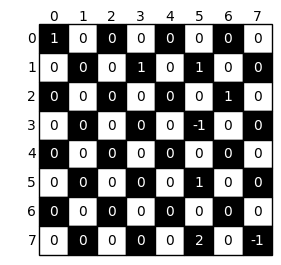

Press to play 

Play: 40 / Played by: Black / Next player: White
Last try: (11, 14)
# iterations: 51 -> False


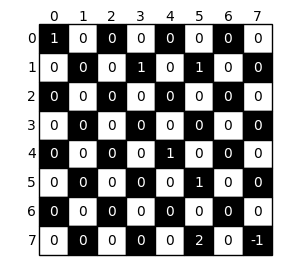

Press to play 

Play: 41 / Played by: White / Next player: Black
Last try: (31, 27)
# iterations: 137 -> False


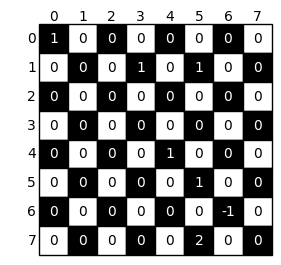

Press to play 

Play: 42 / Played by: Black / Next player: White
Last try: (30, 27)
# iterations: 61 -> False


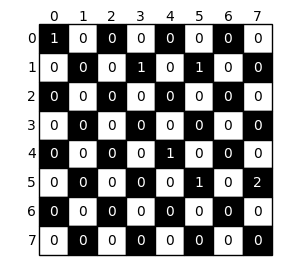

Press to play 

Play: 43 / Played by: White / Next player: Black


'=> Game over! The winner is Black :)'

In [37]:
game(action_space, state ,counter) #test game

In [15]:
def vis(board):
    new_board = np.array_split(board, 8)
    i = 0
    finished_board = []
    for i in range(0,8):
        if i%2 == 0:
            row =[]
            for x in new_board[i]:
                row.append(x)
                row.append(0)
        else:
            row = []
            for x in new_board[i]:
                row.append(0)
                row.append(x)
        finished_board.append(row)
    ary = np.array(finished_board)
    brd = checkerboard_plot(cell_colors=('black', 'white'), font_colors=('white', 'black'), ary = ary, fmt = '%d',
                            figsize=(5, 5), fontsize = 15)
    plt.show()

In [28]:
board_3 = np.array([ 0,  0,  0,  0, -1,  0,  0, -1, -1, -2, -2,  0,  0,  0,  0,  0, -2,
        0, -1,  0,  0,  0,  2,  1, -2, -1, -1,  0,  0,  0,  0,  0])

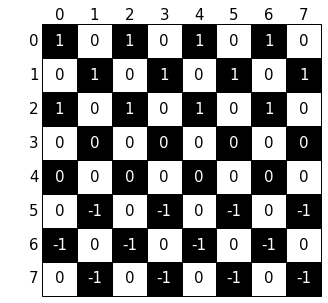

In [700]:
vis(board_1)

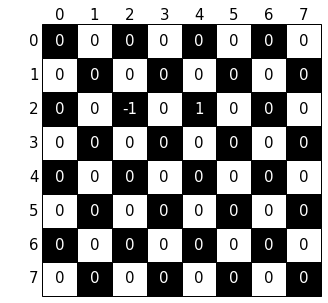

In [655]:
bb = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,])


bb[10] = 1
bb[9] = -1

vis(bb)

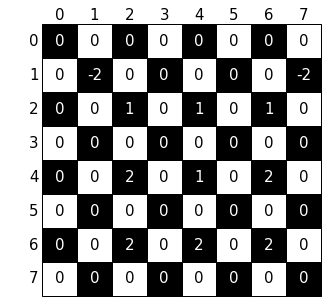

In [662]:
vis(b)

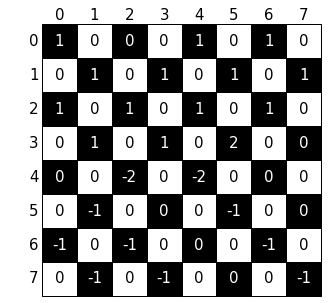

In [32]:
board_2 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
board_2[17]= -2
board_2[18]= -2
board_2[23]= 0
board_2[13]= 1
board_2[14]= 2
board_2[5]= 1
board_2[6]= 1
board_2[26]= 0
board_2[30]= 0
board_2[1]= 0

vis(board_2)